# 3.0 Build models

AIMS

In this document, the following models are implemented:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from mypackage import dir
from mypackage.transforms import convert_variables
from rfm import cut_rfm
from help import cluster_summary

modality =  modality = 'p'
project = 'australian'
data = dir.make_dir_line(modality, project) 
processed = data('processed')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

## 3.1 Load data

In [3]:
dataset = pd.read_parquet(processed/'dataset.parquet.gzip')
dataset = dataset.loc[:,['id_cliente', 'recency', 'frequency', 'monetary',]]
dataset.head()

,id_cliente,recency,frequency,monetary
0,1001,82,21,894.448
1,1002,303,14,1127.408
2,1003,102,15,699.168
3,1004,86,19,1054.560
4,1005,183,22,1608.320


## 3.2 RFM groups

In [4]:
df_models = dataset.copy()
df_models = cut_rfm(df_models)
df_models = df_models.loc[:,['recency', 'frequency', 'monetary', 'group_rfm']]
df_models.head()

,recency,frequency,monetary,group_rfm
0,82,21,894.448,Low Potential
1,303,14,1127.408,Uniquely Promising Highs
2,102,15,699.168,About to Sleep
3,86,19,1054.560,High Potential
4,183,22,1608.320,Need Attention


In [5]:
df_models['group_rfm'].value_counts()

group_rfm
About to Sleep              93
New Customers               91
Hibernating                 79
High Potential              62
Champions                   59
Need Attention              51
At Risk                     19
Low Potential               18
Uniquely Promising Highs    17
High New Customers          11
Name: count, dtype: int64

In [6]:
df_models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    500 non-null    int64  
 1   frequency  500 non-null    int64  
 2   monetary   500 non-null    float64
 3   group_rfm  500 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 15.8+ KB


In [7]:
rfm_statistics = cluster_summary(df_models, 'group_rfm', sta=True, statistics_list=['mean'])
rfm_statistics = rfm_statistics.sort_values(by=['statistic', 'value'], ascending=[False, True])
rfm_statistics

,category,statistic,value
8,New Customers,recency_mean,0.059037
6,Low Potential,recency_mean,0.075691
2,Champions,recency_mean,0.082400
4,High New Customers,recency_mean,0.099146
5,High Potential,recency_mean,0.134745
1,At Risk,recency_mean,0.222665
0,About to Sleep,recency_mean,0.244850
7,Need Attention,recency_mean,0.328940
9,Uniquely Promising Highs,recency_mean,0.342960
3,Hibernating,recency_mean,0.404208


In [8]:
fig = px.line(rfm_statistics, x="statistic", y="value", color='category',
              title='Snake plot of normalized variables (building)')
fig.show()

## 3.3 kmeans

In [8]:
dataset = pd.read_parquet(processed/'dataset.parquet.gzip')
dataset = dataset.loc[:,['id_cliente', 'sexo', 'age_days', 'recency', 'monetary',
       'Babucha', 'Bermuda', 'Calza', 'Camisa', 'Capri', 'Chaleco', 'Jean',
       'Mini', 'Pantalón', 'Pollera', 'Remera', 'Short',
       'Strapless', 'Vestido', 'local']]
dataset.head()

,id_cliente,sexo,age_days,recency,monetary,Babucha,Bermuda,Calza,Camisa,Capri,Chaleco,Jean,Mini,Pantalón,Pollera,Remera,Short,Strapless,Vestido,local
0,1001,1,34247,82,894.448,0.0,0.000000,0.047619,0.142857,0.047619,0.047619,0.095238,0.095238,0.0,0.000000,0.190476,0.142857,0.000000,0.0,0.428571
1,1002,1,30466,303,1127.408,0.0,0.000000,0.000000,0.285714,0.071429,0.000000,0.071429,0.000000,0.0,0.071429,0.357143,0.000000,0.000000,0.0,0.500000
2,1003,0,39356,102,699.168,0.0,0.000000,0.000000,0.333333,0.000000,0.066667,0.066667,0.000000,0.0,0.000000,0.200000,0.200000,0.000000,0.0,0.466667
3,1004,0,14272,86,1054.560,0.0,0.000000,0.000000,0.263158,0.052632,0.000000,0.157895,0.052632,0.0,0.000000,0.157895,0.000000,0.000000,0.0,0.578947
4,1005,0,2794,183,1608.320,0.0,0.045455,0.000000,0.272727,0.000000,0.000000,0.181818,0.045455,0.0,0.000000,0.181818,0.045455,0.045455,0.0,0.772727


In [9]:
# Escalar las características
scaler = MinMaxScaler()
scaler2 = StandardScaler()
data_scaled = scaler.fit_transform(dataset.loc[:, dataset.columns != 'id_cliente'])
data_scaled = scaler2.fit_transform(data_scaled)

In [10]:
cluster_range = range(2, 12)
inertia_values = []
silhouette_scores = []

for n_clusters in cluster_range:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    
    # Append inertia (codo) and silhouette score to the lists
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

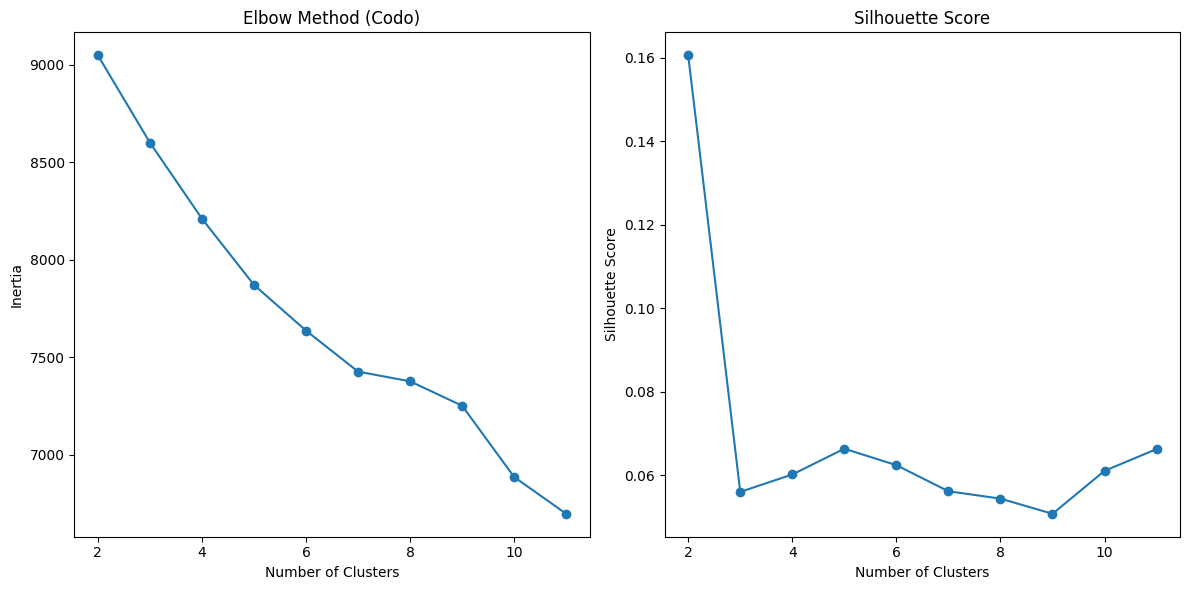

In [11]:
# Plot the elbow method (codo)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method (Codo)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=5, random_state=42)

In [28]:
df_models2 = dataset.copy()
df_models2 = df_models2.loc[:,['age_days', 'recency', 'monetary',
       'Babucha', 'Bermuda', 'Calza', 'Camisa', 'Capri', 'Chaleco', 'Jean',
       'Mini', 'Pantalón', 'Pollera', 'Remera', 'Short',
       'Strapless', 'Vestido', 'local']]
df_models2['group_kmeans'] = kmeans.predict(data_scaled)
df_models2.head()

,age_days,recency,monetary,Babucha,Bermuda,Calza,Camisa,Capri,Chaleco,Jean,Mini,Pantalón,Pollera,Remera,Short,Strapless,Vestido,local,group_kmeans
0,34247,82,894.448,0.0,0.000000,0.047619,0.142857,0.047619,0.047619,0.095238,0.095238,0.0,0.000000,0.190476,0.142857,0.000000,0.0,0.428571,1
1,30466,303,1127.408,0.0,0.000000,0.000000,0.285714,0.071429,0.000000,0.071429,0.000000,0.0,0.071429,0.357143,0.000000,0.000000,0.0,0.500000,1
2,39356,102,699.168,0.0,0.000000,0.000000,0.333333,0.000000,0.066667,0.066667,0.000000,0.0,0.000000,0.200000,0.200000,0.000000,0.0,0.466667,1
3,14272,86,1054.560,0.0,0.000000,0.000000,0.263158,0.052632,0.000000,0.157895,0.052632,0.0,0.000000,0.157895,0.000000,0.000000,0.0,0.578947,2
4,2794,183,1608.320,0.0,0.045455,0.000000,0.272727,0.000000,0.000000,0.181818,0.045455,0.0,0.000000,0.181818,0.045455,0.045455,0.0,0.772727,2


In [29]:
df_models2['group_kmeans'].value_counts()

group_kmeans
2    176
1    171
4     78
3     45
0     30
Name: count, dtype: int64

In [30]:
df_models2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age_days      500 non-null    int64  
 1   recency       500 non-null    int64  
 2   monetary      500 non-null    float64
 3   Babucha       500 non-null    float64
 4   Bermuda       500 non-null    float64
 5   Calza         500 non-null    float64
 6   Camisa        500 non-null    float64
 7   Capri         500 non-null    float64
 8   Chaleco       500 non-null    float64
 9   Jean          500 non-null    float64
 10  Mini          500 non-null    float64
 11  Pantalón      500 non-null    float64
 12  Pollera       500 non-null    float64
 13  Remera        500 non-null    float64
 14  Short         500 non-null    float64
 15  Strapless     500 non-null    float64
 16  Vestido       500 non-null    float64
 17  local         500 non-null    float64
 18  group_kmeans  500 non-null    

In [31]:
kmeans_statistics = cluster_summary(df_models2, 'group_kmeans', statistics_list=['mean'])
kmeans_statistics = kmeans_statistics.sort_values(by=['statistic', 'value'], ascending=[False, True])
kmeans_statistics

,category,statistic,value
7,2,recency_mean,94.221591
9,4,recency_mean,123.051282
5,0,recency_mean,130.333333
6,1,recency_mean,150.280702
8,3,recency_mean,155.066667
11,1,monetary_mean,803.760187
13,3,monetary_mean,811.762133
14,4,monetary_mean,892.100718
10,0,monetary_mean,944.995200
12,2,monetary_mean,1105.551909


## 3.4 GMM

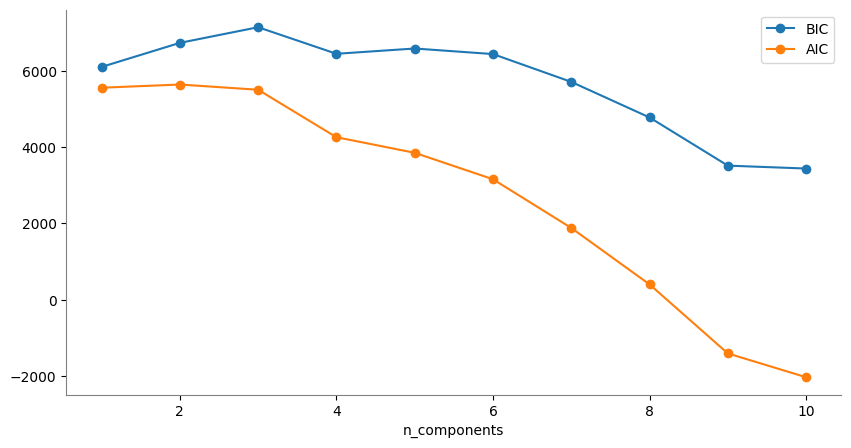

In [148]:
n_components = np.arange(2, 11)

gaussianModels = [
    GaussianMixture(n, covariance_type="full", random_state=0).fit(data_scaled)
    for n in n_components
]

plt.figure(figsize=(10, 5))
plt.plot(n_components, [model.bic(data_scaled) for model in gaussianModels], "o-", label="BIC")
plt.plot(n_components, [model.aic(data_scaled) for model in gaussianModels], "o-", label="AIC")
plt.legend(loc="best")
plt.xlabel("n_components")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [185]:
n_components = 3
gaussianMixture = GaussianMixture(
    n_components=n_components,
    covariance_type="full",
    max_iter=100,
    init_params="kmeans", #ramdom
)

gaussianMixture.fit(data_scaled)
df_models["group_gmm"] = gaussianMixture.predict(data_scaled)
dataset["group_gmm"] = gaussianMixture.predict(data_scaled)

In [186]:
dataset.head()

,id_cliente,sexo,age_days,recency,monetary,Babucha,Bermuda,Calza,Camisa,Capri,Chaleco,Jean,Mini,Pantalón,Pollera,Remera,Short,Strapless,Vestido,local,group_gmm
0,1001,1,34263,5,2592.016,0.000000,0.035714,0.053571,0.107143,0.053571,0.107143,0.107143,0.035714,0.000000,0.000000,0.053571,0.142857,0.035714,0.053571,0.500000,0
1,1002,1,30482,5,3161.840,0.020408,0.020408,0.000000,0.102041,0.102041,0.102041,0.163265,0.000000,0.020408,0.000000,0.102041,0.142857,0.000000,0.000000,0.510204,2
2,1003,0,39372,63,3025.264,0.035714,0.017857,0.000000,0.125000,0.071429,0.053571,0.142857,0.035714,0.017857,0.000000,0.125000,0.107143,0.071429,0.000000,0.517857,1
3,1004,0,14288,39,3657.104,0.015385,0.015385,0.000000,0.153846,0.107692,0.030769,0.092308,0.015385,0.000000,0.015385,0.153846,0.123077,0.015385,0.000000,0.630769,1
4,1005,0,2810,58,3396.528,0.000000,0.000000,0.017544,0.105263,0.105263,0.070175,0.192982,0.052632,0.017544,0.000000,0.105263,0.035088,0.052632,0.035088,0.421053,2


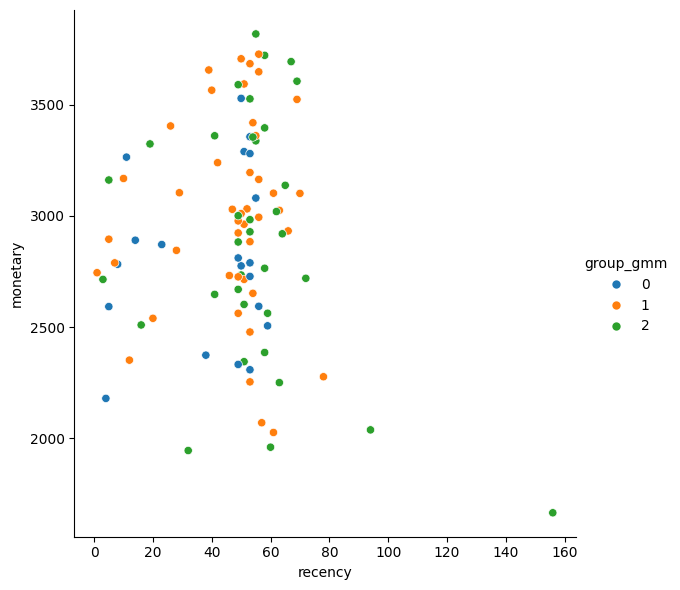

In [187]:
# Revisar (no terminados)
# sns.relplot(
#     x="recency",
#     y="monetary",
#     data=dataset,
#     hue="group_gmm",
#     height=6,
#     palette="tab10",
# )
# plt.show()

In [ ]:
print('ok_')